# Part1: TTS Inference Demo using NeMo

This notebook aims to synthesise speech samples using the available pretrained models



# Setting up the Environment


1.   Save a copy in Drive
2.   Use GPU runtime
3.   Install the dependencies



## Save a copy in Drive
In Google Colab, select *File --> Save a copy in Drive*

## Use GPU runtime
select *RunTime -->  Change Runtime Type --> select "GPU" for hardware accelerator*

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-1506bb83-1244-be7a-55d5-9521463b65a5)


## Installation

In [1]:
!pip install nemo_toolkit['all']
# install Pynini for text normalization
! wget https://raw.githubusercontent.com/NVIDIA/NeMo/main/nemo_text_processing/install_pynini.sh
! bash install_pynini.sh


--2024-04-04 04:26:24--  https://raw.githubusercontent.com/NVIDIA/NeMo/main/nemo_text_processing/install_pynini.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-04-04 04:26:24 ERROR 404: Not Found.

bash: install_pynini.sh: No such file or directory


# Inference the TTS
We aim to synthesise speech samples using the available pretrained models

## Load pretrained models

This section shows how to load the pretrained model provided by NeMo with two functions;
1.   list_available_models()
2.   from_pretrained()


In [2]:
from nemo.collections.tts.models.base import SpectrogramGenerator
print(SpectrogramGenerator.list_available_models())

[PretrainedModelInfo(
	pretrained_model_name=tts_en_fastpitch,
	description=This model is trained on LJSpeech sampled at 22050Hz with and can be used to generate female English voices with an American accent. It is ARPABET-based.,
	location=https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_en_fastpitch/versions/1.8.1/files/tts_en_fastpitch_align.nemo,
	class_=<class 'nemo.collections.tts.models.fastpitch.FastPitchModel'>
), PretrainedModelInfo(
	pretrained_model_name=tts_en_fastpitch_ipa,
	description=This model is trained on LJSpeech sampled at 22050Hz with and can be used to generate female English voices with an American accent. It is IPA-based.,
	location=https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_en_fastpitch/versions/IPA_1.13.0/files/tts_en_fastpitch_align_ipa.nemo,
	class_=<class 'nemo.collections.tts.models.fastpitch.FastPitchModel'>
), PretrainedModelInfo(
	pretrained_model_name=tts_en_fastpitch_multispeaker,
	description=This model is trained on HiFITTS sampled a

In [3]:
from nemo.collections.tts.models.base import Vocoder
print(Vocoder.list_available_models())

[PretrainedModelInfo(
	pretrained_model_name=tts_en_waveglow_88m,
	description=This model is trained on LJSpeech sampled at 22050Hz, and has been tested on generating female English voices with an American accent and Mandarin voices.,
	location=https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_waveglow_88m/versions/1.0.0/files/tts_waveglow.nemo,
	class_=<class 'nemo.collections.tts.models.waveglow.WaveGlowModel'>
), PretrainedModelInfo(
	pretrained_model_name=tts_en_hifigan,
	description=This model is trained on LJSpeech audio sampled at 22050Hz and mel spectrograms generated from Tacotron2, TalkNet, and FastPitch. This model has been tested on generating female English voices with an American accent.,
	location=https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_hifigan/versions/1.0.0rc1/files/tts_hifigan.nemo,
	class_=<class 'nemo.collections.tts.models.hifigan.HifiGanModel'>
), PretrainedModelInfo(
	pretrained_model_name=tts_en_lj_hifigan_ft_mixertts,
	description=This model is 

### Single Speaker TTS

In [4]:
fastpitchSingle_model=SpectrogramGenerator.from_pretrained('tts_en_fastpitch').eval().cuda()
hifiganSingle_model=Vocoder.from_pretrained('tts_en_hifigan').eval().cuda()

[NeMo I 2024-04-04 04:27:21 cloud:68] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_en_fastpitch/versions/1.8.1/files/tts_en_fastpitch_align.nemo to /root/.cache/torch/NeMo/NeMo_1.23.0/tts_en_fastpitch_align/b7d086a07b5126c12d5077d9a641a38c/tts_en_fastpitch_align.nemo
[NeMo I 2024-04-04 04:27:22 common:924] Instantiating model from pre-trained checkpoint


 NeMo-text-processing :: INFO     :: Creating ClassifyFst grammars.
INFO:NeMo-text-processing:Creating ClassifyFst grammars.
[NeMo W 2024-04-04 04:28:05 en_us_arpabet:66] apply_to_oov_word=None, This means that some of words will remain unchanged if they are not handled by any of the rules in self.parse_one_word(). This may be intended if phonemes and chars are both valid inputs, otherwise, you may see unexpected deletions in your input.
[NeMo W 2024-04-04 04:28:05 modelPT:165] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.torch.data.TTSDataset
      manifest_filepath: /ws/LJSpeech/nvidia_ljspeech_train_clean_ngc.json
      sample_rate: 22050
      sup_data_path: /raid/LJSpeech/supplementary
      sup_data_types:
      - align_prior_matrix
      - pitch
      n_fft: 1024
      win_length: 1024
  

[NeMo I 2024-04-04 04:28:05 features:289] PADDING: 1
[NeMo I 2024-04-04 04:28:06 save_restore_connector:249] Model FastPitchModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.23.0/tts_en_fastpitch_align/b7d086a07b5126c12d5077d9a641a38c/tts_en_fastpitch_align.nemo.
[NeMo I 2024-04-04 04:28:06 cloud:68] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_hifigan/versions/1.0.0rc1/files/tts_hifigan.nemo to /root/.cache/torch/NeMo/NeMo_1.23.0/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo
[NeMo I 2024-04-04 04:28:08 common:924] Instantiating model from pre-trained checkpoint


[NeMo W 2024-04-04 04:28:11 modelPT:165] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/train_finetune.txt
      min_duration: 0.75
      n_segments: 8192
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 64
      num_workers: 4
    
[NeMo W 2024-04-04 04:28:11 modelPT:172] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/val_finetune.txt
      min_duration: 3
      n_segments: 66150


[NeMo I 2024-04-04 04:28:11 features:289] PADDING: 0


[NeMo W 2024-04-04 04:28:11 features:266] Using torch_stft is deprecated and has been removed. The values have been forcibly set to False for FilterbankFeatures and AudioToMelSpectrogramPreprocessor. Please set exact_pad to True as needed.


[NeMo I 2024-04-04 04:28:11 features:289] PADDING: 0


[NeMo W 2024-04-04 04:28:11 nemo_logging:349] /usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
      warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
    


[NeMo I 2024-04-04 04:28:13 save_restore_connector:249] Model HifiGanModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.23.0/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo.


### Multi Speaker TTS

In [5]:
fastpitchMulti_model=SpectrogramGenerator.from_pretrained('tts_en_fastpitch_multispeaker').eval().cuda()
hifiganMulti_model=Vocoder.from_pretrained('tts_en_hifitts_hifigan_ft_fastpitch').eval().cuda()

[NeMo I 2024-04-04 04:28:13 cloud:68] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_en_multispeaker_fastpitchhifigan/versions/1.10.0/files/tts_en_fastpitch_multispeaker.nemo to /root/.cache/torch/NeMo/NeMo_1.23.0/tts_en_fastpitch_multispeaker/b96451578e2b9a39d62cfc642bc5ffcf/tts_en_fastpitch_multispeaker.nemo
[NeMo I 2024-04-04 04:28:24 common:924] Instantiating model from pre-trained checkpoint


 NeMo-text-processing :: INFO     :: Creating ClassifyFst grammars.
INFO:NeMo-text-processing:Creating ClassifyFst grammars.
[NeMo W 2024-04-04 04:29:04 en_us_arpabet:66] apply_to_oov_word=None, This means that some of words will remain unchanged if they are not handled by any of the rules in self.parse_one_word(). This may be intended if phonemes and chars are both valid inputs, otherwise, you may see unexpected deletions in your input.
[NeMo W 2024-04-04 04:29:04 modelPT:165] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.torch.data.TTSDataset
      manifest_filepath: /ws/HiFiTTS/manifest_train_ngc.json
      sample_rate: 44100
      sup_data_path: /raid/sup_data_path_44100_new
      sup_data_types:
      - align_prior_matrix
      - pitch
      - speaker_id
      n_fft: 2048
      win_length: 2

[NeMo I 2024-04-04 04:29:04 features:289] PADDING: 1
[NeMo I 2024-04-04 04:29:05 save_restore_connector:249] Model FastPitchModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.23.0/tts_en_fastpitch_multispeaker/b96451578e2b9a39d62cfc642bc5ffcf/tts_en_fastpitch_multispeaker.nemo.
[NeMo I 2024-04-04 04:29:05 cloud:68] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_en_multispeaker_fastpitchhifigan/versions/1.10.0/files/tts_en_hifitts_hifigan_ft_fastpitch.nemo to /root/.cache/torch/NeMo/NeMo_1.23.0/tts_en_hifitts_hifigan_ft_fastpitch/dcbdefa79d5e3587c93636d4f53260b8/tts_en_hifitts_hifigan_ft_fastpitch.nemo
[NeMo I 2024-04-04 04:29:07 common:924] Instantiating model from pre-trained checkpoint


[NeMo W 2024-04-04 04:29:08 modelPT:165] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.torch.data.VocoderDataset
      manifest_filepath: /manifests/hifitts_fp_1000epoch_mels_train.json
      sample_rate: 44100
      n_segments: 16384
      max_duration: null
      min_duration: 0.75
      load_precomputed_mel: true
      hop_length: 512
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 100
      num_workers: 4
    
[NeMo W 2024-04-04 04:29:08 modelPT:172] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.tts.torch.data.VocoderDataset


[NeMo I 2024-04-04 04:29:08 features:289] PADDING: 0
[NeMo I 2024-04-04 04:29:08 features:297] STFT using exact pad
[NeMo I 2024-04-04 04:29:08 features:289] PADDING: 0
[NeMo I 2024-04-04 04:29:08 features:297] STFT using exact pad
[NeMo I 2024-04-04 04:29:09 save_restore_connector:249] Model HifiGanModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.23.0/tts_en_hifitts_hifigan_ft_fastpitch/dcbdefa79d5e3587c93636d4f53260b8/tts_en_hifitts_hifigan_ft_fastpitch.nemo.


## Inference

Now that we have downloaded the model checkpoints and loaded them into memory. Let's define a short infer helper function that takes a string, and our two models to produce speech.

Notice that the NeMo TTS model interface is fairly simple and standardized across all models. Mel Spectrogram generators have two helper functions:

- parse(): Accepts raw python strings and returns a torch.tensor that represents tokenized text
- generate_spectrogram(): Accepts a batch of tokenized text and returns a torch.tensor that represents a batch of spectrograms

Vocoder have just one helper function:

- convert_spectrogram_to_audio(): Accepts a batch of spectrograms and returns a torch.tensor that represents a batch of raw audio

In [6]:
import IPython
def show_spectrogram(spect):
  imshow(spect, origin="lower")
  plt.show()

def text_to_audio(text,specGen,vocoderGen,spk_id):
  print('Input_text:'+text)
  parsed = specGen.parse(text)
  print('\nParsed_text:')
  print(parsed)
  spectrogram = specGen.generate_spectrogram(tokens=parsed,speaker=spk_id)
  audio = vocoderGen.convert_spectrogram_to_audio(spec=spectrogram)
  return spectrogram.to('cpu').detach().numpy(),audio.to('cpu').detach().numpy()



Now that everything is set up, let's give an input that we want our models to speak

In [7]:
text='hello this is a test'
spk_id=None
spect1,audio1=text_to_audio(text,fastpitchSingle_model ,hifiganSingle_model, spk_id)


Input_text:hello this is a test

Parsed_text:
tensor([[ 0, 77, 74, 81, 81, 84,  0, 89, 77, 78, 88,  0, 78, 88,  0, 70,  0, 18,
         44, 16, 18,  0]], device='cuda:0')


# Results

After our model generates the audio, let's go ahead and play it. We can also visualize the spectrogram that was produced from the first stage model if a spectrogram generator was used.

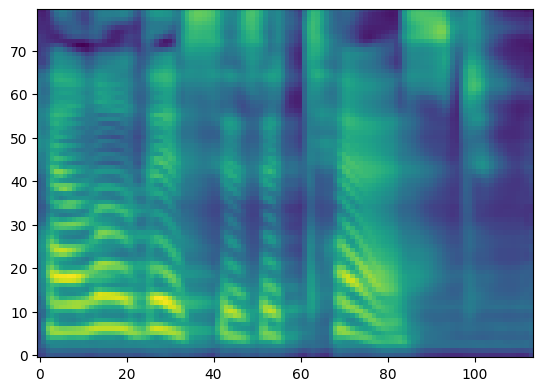

In [8]:
%matplotlib inline
import IPython.display as ipd
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt


imshow(spect1[0], origin="lower")
plt.show()

ipd.display(ipd.Audio(audio1, rate=22050))


Input_text:hello this is a test, I would love to know the difference between Single and Multi-speaker model

Parsed_text:
tensor([[  0,  77,  74,  81,  81,  84,   0,  89,  77,  78,  88,   0,  78,  88,
           0,  70,   0,  18,  44,  16,  18,  97,   0,  41,   0,  21,  65,   3,
           0,  10,  32,  20,   0,  89,  84,   0,  12,  59,   0,  89,  77,  74,
           0,  73,  78,  75,  75,  74,  87,  74,  83,  72,  74,   0,  71,  74,
          89,  92,  74,  74,  83,   0,  16,  53,  13,   6,  31,  10,   0,  70,
          83,  73,   0,  11,  32,  10,  18,  55, 101,  16,  14,  56,   9,  46,
           0,  11,  26,   3,  31,  10,   0]], device='cuda:0')


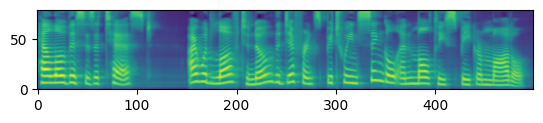

Input_text:hello this is a test, I would love to know the difference between Single and Multi-speaker model

Parsed_text:
tensor([[  0,  77,  74,  81,  81,  84,   0,  89,  77,  78,  88,   0,  78,  88,
           0,  70,   0,  18,  44,  16,  18,  97,   0,  41,   0,  21,  65,   3,
           0,  10,  32,  20,   0,  89,  84,   0,  12,  59,   0,  89,  77,  74,
           0,  73,  78,  75,  75,  74,  87,  74,  83,  72,  74,   0,  71,  74,
          89,  92,  74,  74,  83,   0,  16,  53,  13,   6,  31,  10,   0,  70,
          83,  73,   0,  11,  32,  10,  18,  55, 101,  16,  14,  56,   9,  46,
           0,  11,  26,   3,  31,  10,   0]], device='cuda:0')


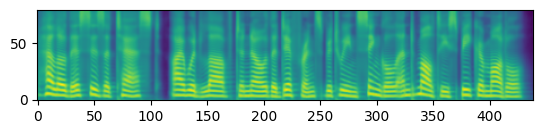

In [32]:
text='hello this is a test, I would love to know the difference between Single and Multi-speaker model'
spk_id=5
spect1,audio1=text_to_audio(text,fastpitchSingle_model,hifiganSingle_model,spk_id)
show_spectrogram(spect1[0])
ipd.display(ipd.Audio(audio1, rate=23050))

spect2, audio2 = text_to_audio(text,fastpitchMulti_model,hifiganMulti_model,spk_id)
show_spectrogram(spect2[0])
ipd.display(ipd.Audio(audio2, rate=44100))

In [27]:
parsed = fastpitchMulti_model.parse(text)
spectrogram = fastpitchMulti_model.generate_spectrogram(tokens=parsed,speaker=8)
audio = hifiganMulti_model.convert_spectrogram_to_audio(spec=spectrogram)
ipd.display(ipd.Audio(audio.to('cpu').detach().numpy(), rate=44010))

# Part2: Speech-to-speech Translation

This notebook aims to swap speech samples

## Russian to English

In [11]:
# Import Natural Language Processing colleciton
import nemo.collections.nlp as nemo_nlp

# https://docs.nvidia.com/deeplearning/nemo/user-guide/docs/en/stable/nlp/machine_translation/machine_translation.html
# Here is an example of all Machine Translation models:
nemo_nlp.models.MTEncDecModel.list_available_models()
# More MT Models are available - see: nemo_nlp.models.MTEncDecModel.list_available_models()

[PretrainedModelInfo(
 	pretrained_model_name=nmt_en_de_transformer12x2,
 	description=En->De translation model. See details here: https://ngc.nvidia.com/catalog/models/nvidia:nemo:nmt_en_de_transformer12x2,
 	location=https://api.ngc.nvidia.com/v2/models/nvidia/nemo/nmt_en_de_transformer12x2/versions/1.0.0rc1/files/nmt_en_de_transformer12x2.nemo
 ),
 PretrainedModelInfo(
 	pretrained_model_name=nmt_de_en_transformer12x2,
 	description=De->En translation model. See details here: https://ngc.nvidia.com/catalog/models/nvidia:nemo:nmt_de_en_transformer12x2,
 	location=https://api.ngc.nvidia.com/v2/models/nvidia/nemo/nmt_de_en_transformer12x2/versions/1.0.0rc1/files/nmt_de_en_transformer12x2.nemo
 ),
 PretrainedModelInfo(
 	pretrained_model_name=nmt_en_es_transformer12x2,
 	description=En->Es translation model. See details here: https://ngc.nvidia.com/catalog/models/nvidia:nemo:nmt_en_es_transformer12x2,
 	location=https://api.ngc.nvidia.com/v2/models/nvidia/nemo/nmt_en_es_transformer12x2/

In [12]:
# Import NeMo and it's ASR, NLP and TTS collections
import nemo
# Import Speech Recognition collection
import nemo.collections.asr as nemo_asr
# Import Natural Language Processing colleciton
import nemo.collections.nlp as nemo_nlp
# Import Speech Synthesis collection
import nemo.collections.tts as nemo_tts

# Next, we instantiate all the necessary models directly from NVIDIA NGC
# Speech Recognition model - QuartzNet trained on Russian part of MCV 6.0
quartznet = nemo_asr.models.EncDecCTCModel.from_pretrained(model_name="stt_ru_quartznet15x5").cuda()
# Neural Machine Translation model
nmt_model = nemo_nlp.models.MTEncDecModel.from_pretrained(model_name='nmt_ru_en_transformer6x6').cuda()
#nmt_model = nemo_nlp.models.MTEncDecModel.from_pretrained(model_name='nmt_zh_en_transformer6x6').cuda()
# Spectrogram generator which takes text as an input and produces spectrogram
spectrogram_generator = nemo_tts.models.FastPitchModel.from_pretrained(model_name="tts_en_fastpitch").cuda()
# Vocoder model which takes spectrogram and produces actual audio
vocoder = nemo_tts.models.HifiGanModel.from_pretrained(model_name="tts_en_hifigan").cuda()





[NeMo I 2024-04-04 04:29:13 cloud:68] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/stt_ru_quartznet15x5/versions/1.0.0rc1/files/stt_ru_quartznet15x5.nemo to /root/.cache/torch/NeMo/NeMo_1.23.0/stt_ru_quartznet15x5/92506570b7206ea395e295b3fbbf07e3/stt_ru_quartznet15x5.nemo
[NeMo I 2024-04-04 04:29:15 common:924] Instantiating model from pre-trained checkpoint


[NeMo W 2024-04-04 04:29:16 modelPT:165] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /raid/noneval.json
    sample_rate: 16000
    labels:
    - ' '
    - а
    - б
    - в
    - г
    - д
    - е
    - ё
    - ж
    - з
    - и
    - й
    - к
    - л
    - м
    - н
    - о
    - п
    - р
    - с
    - т
    - у
    - ф
    - х
    - ц
    - ч
    - ш
    - щ
    - ъ
    - ы
    - ь
    - э
    - ю
    - я
    batch_size: 16
    trim_silence: true
    max_duration: 16.7
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    num_workers: 8
    pin_memory: true
    
[NeMo W 2024-04-04 04:29:16 modelPT:172] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation da

[NeMo I 2024-04-04 04:29:16 features:289] PADDING: 16
[NeMo I 2024-04-04 04:29:17 save_restore_connector:249] Model EncDecCTCModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.23.0/stt_ru_quartznet15x5/92506570b7206ea395e295b3fbbf07e3/stt_ru_quartznet15x5.nemo.
[NeMo I 2024-04-04 04:29:17 cloud:68] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/nmt_ru_en_transformer6x6/versions/1.0.0rc1/files/nmt_ru_en_transformer6x6.nemo to /root/.cache/torch/NeMo/NeMo_1.23.0/nmt_ru_en_transformer6x6/3db82426b17db1ae7cc7ae4ee3e3679b/nmt_ru_en_transformer6x6.nemo
[NeMo I 2024-04-04 04:29:50 common:924] Instantiating model from pre-trained checkpoint
[NeMo I 2024-04-04 04:29:59 tokenizer_utils:179] Getting YouTokenToMeTokenizer with model: /tmp/tmpsw1gbu_r/tokenizer.all.32000.BPE.model with r2l: False.
[NeMo I 2024-04-04 04:29:59 tokenizer_utils:179] Getting YouTokenToMeTokenizer with model: /tmp/tmpsw1gbu_r/tokenizer.all.32000.BPE.model with r2l: False.


[NeMo W 2024-04-04 04:29:59 modelPT:165] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    src_file_name: /home/sandeepsub/Datasets/wmt/wmt20_en_zh/processed/batches.tokens.cmwt.septokenizer.16000.pkl
    tgt_file_name: /home/sandeepsub/Datasets/wmt/wmt20_en_zh/processed/batches.tokens.cmwt.septokenizer.16000.pkl
    tokens_in_batch: 16000
    clean: true
    max_seq_length: 512
    cache_ids: false
    cache_data_per_node: false
    use_cache: false
    shuffle: true
    num_samples: -1
    drop_last: false
    pin_memory: false
    num_workers: 8
    load_from_cached_dataset: true
    reverse_lang_direction: true
    
[NeMo W 2024-04-04 04:29:59 modelPT:172] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the valid

[NeMo I 2024-04-04 04:30:05 save_restore_connector:249] Model MTEncDecModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.23.0/nmt_ru_en_transformer6x6/3db82426b17db1ae7cc7ae4ee3e3679b/nmt_ru_en_transformer6x6.nemo.
[NeMo I 2024-04-04 04:30:05 cloud:58] Found existing object /root/.cache/torch/NeMo/NeMo_1.23.0/tts_en_fastpitch_align/b7d086a07b5126c12d5077d9a641a38c/tts_en_fastpitch_align.nemo.
[NeMo I 2024-04-04 04:30:05 cloud:64] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.23.0/tts_en_fastpitch_align/b7d086a07b5126c12d5077d9a641a38c/tts_en_fastpitch_align.nemo
[NeMo I 2024-04-04 04:30:05 common:924] Instantiating model from pre-trained checkpoint


 NeMo-text-processing :: INFO     :: Creating ClassifyFst grammars.
INFO:NeMo-text-processing:Creating ClassifyFst grammars.
[NeMo W 2024-04-04 04:30:45 en_us_arpabet:66] apply_to_oov_word=None, This means that some of words will remain unchanged if they are not handled by any of the rules in self.parse_one_word(). This may be intended if phonemes and chars are both valid inputs, otherwise, you may see unexpected deletions in your input.
[NeMo W 2024-04-04 04:30:45 modelPT:165] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.torch.data.TTSDataset
      manifest_filepath: /ws/LJSpeech/nvidia_ljspeech_train_clean_ngc.json
      sample_rate: 22050
      sup_data_path: /raid/LJSpeech/supplementary
      sup_data_types:
      - align_prior_matrix
      - pitch
      n_fft: 1024
      win_length: 1024
  

[NeMo I 2024-04-04 04:30:45 features:289] PADDING: 1
[NeMo I 2024-04-04 04:30:45 save_restore_connector:249] Model FastPitchModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.23.0/tts_en_fastpitch_align/b7d086a07b5126c12d5077d9a641a38c/tts_en_fastpitch_align.nemo.
[NeMo I 2024-04-04 04:30:45 cloud:58] Found existing object /root/.cache/torch/NeMo/NeMo_1.23.0/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo.
[NeMo I 2024-04-04 04:30:45 cloud:64] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.23.0/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo
[NeMo I 2024-04-04 04:30:45 common:924] Instantiating model from pre-trained checkpoint


[NeMo W 2024-04-04 04:30:49 modelPT:165] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/train_finetune.txt
      min_duration: 0.75
      n_segments: 8192
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 64
      num_workers: 4
    
[NeMo W 2024-04-04 04:30:49 modelPT:172] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/val_finetune.txt
      min_duration: 3
      n_segments: 66150


[NeMo I 2024-04-04 04:30:49 features:289] PADDING: 0


[NeMo W 2024-04-04 04:30:49 features:266] Using torch_stft is deprecated and has been removed. The values have been forcibly set to False for FilterbankFeatures and AudioToMelSpectrogramPreprocessor. Please set exact_pad to True as needed.


[NeMo I 2024-04-04 04:30:49 features:289] PADDING: 0
[NeMo I 2024-04-04 04:30:50 save_restore_connector:249] Model HifiGanModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.23.0/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo.


In [13]:
!wget https://nemo-public.s3.us-east-2.amazonaws.com/mcv-samples-ru/common_voice_ru_19034087.wav
import librosa
(sig, rate) = librosa.load('common_voice_ru_19034087.wav', sr=None)
ipd.display(ipd.Audio(sig, rate=rate))

--2024-04-04 04:30:51--  https://nemo-public.s3.us-east-2.amazonaws.com/mcv-samples-ru/common_voice_ru_19034087.wav
Resolving nemo-public.s3.us-east-2.amazonaws.com (nemo-public.s3.us-east-2.amazonaws.com)... 3.5.131.146, 52.219.106.146, 52.219.94.154, ...
Connecting to nemo-public.s3.us-east-2.amazonaws.com (nemo-public.s3.us-east-2.amazonaws.com)|3.5.131.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205100 (200K) [audio/wav]
Saving to: ‘common_voice_ru_19034087.wav’

common_voice_ru_190 100%[===================>] 200.29K  1.08MB/s    in 0.2s    

2024-04-04 04:30:51 (1.08 MB/s) - ‘common_voice_ru_19034087.wav’ saved [205100/205100]



In [14]:
# Transcribe an audio file
# IMPORTANT: The audio must be mono with 16Khz sampling rate
# Get example from: https://nemo-public.s3.us-east-2.amazonaws.com/mcv-samples-ru/common_voice_ru_19034087.wav
russian_text = quartznet.transcribe(['common_voice_ru_19034087.wav'])
print(russian_text)
# You should see russian text here. Let's translate it to English
english_text = nmt_model.translate(russian_text)
print(english_text)

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

['я предлагаю пока оставить этот пункт до его прояснения']
['I suggest that this paragraph be left for the time being until it is clarified .']


Input_text:I suggest that this paragraph be left for the time being until it is clarified .

Parsed_text:
tensor([[ 0, 41,  0, 16, 31,  8, 44, 16, 18,  0, 89, 77, 70, 89,  0, 89, 77, 78,
         88,  0, 85, 70, 87, 70, 76, 87, 70, 85, 77,  0, 71, 74,  0, 10, 44,  5,
         18,  0, 75, 84, 87,  0, 89, 77, 74,  0, 18, 41, 11,  0,  1, 56, 52, 13,
          0, 31, 12, 18, 53, 10,  0, 78, 89,  0, 78, 88,  0,  9, 10, 44, 15, 31,
          5, 42,  3,  0, 98,  0]], device='cuda:0')


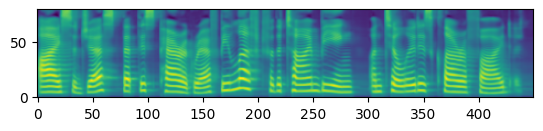

In [15]:
spect1,audio1=text_to_audio(english_text[0],fastpitchSingle_model,hifiganSingle_model,None)
show_spectrogram(spect1[0])
ipd.display(ipd.Audio(audio1, rate=22050))

## Chinese to English Translation

In [16]:
# Neural Machine Translation model
nmt_model = nemo_nlp.models.MTEncDecModel.from_pretrained(model_name='nmt_zh_en_transformer6x6').cuda()


[NeMo I 2024-04-04 04:31:34 cloud:68] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/nmt_zh_en_transformer6x6/versions/1.0.0rc1/files/nmt_zh_en_transformer6x6.nemo to /root/.cache/torch/NeMo/NeMo_1.23.0/nmt_zh_en_transformer6x6/eff3792e6f4420ba83436be889e92d79/nmt_zh_en_transformer6x6.nemo
[NeMo I 2024-04-04 04:32:15 common:924] Instantiating model from pre-trained checkpoint
[NeMo I 2024-04-04 04:32:27 tokenizer_utils:179] Getting YouTokenToMeTokenizer with model: /tmp/tmpp_mbuzar/tokenizer.decoder.32000.BPE.model with r2l: False.
[NeMo I 2024-04-04 04:32:27 tokenizer_utils:179] Getting YouTokenToMeTokenizer with model: /tmp/tmpp_mbuzar/tokenizer.encoder.32000.BPE.model with r2l: False.


[NeMo W 2024-04-04 04:32:27 modelPT:165] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    src_file_name: /raid/tarred_data_accaligned_16k_tokens_32k_vocab_cov_0.999/batches.tokens.16000._OP_1..144_CL_.tar
    tgt_file_name: /raid/tarred_data_accaligned_16k_tokens_32k_vocab_cov_0.999/batches.tokens.16000._OP_1..144_CL_.tar
    tokens_in_batch: 16000
    clean: true
    max_seq_length: 512
    cache_ids: false
    cache_data_per_node: false
    use_cache: false
    shuffle: true
    num_samples: -1
    drop_last: false
    pin_memory: false
    num_workers: 8
    load_from_cached_dataset: false
    reverse_lang_direction: true
    load_from_tarred_dataset: true
    metadata_path: /raid/tarred_data_accaligned_16k_tokens_32k_vocab_cov_0.999/metadata.json
    tar_shuffle_n: 100
    
[NeMo W 2024-04-04 04:32:27 modelPT:172] If you intend to do valida

[NeMo I 2024-04-04 04:32:32 save_restore_connector:249] Model MTEncDecModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.23.0/nmt_zh_en_transformer6x6/eff3792e6f4420ba83436be889e92d79/nmt_zh_en_transformer6x6.nemo.


In [17]:
# Speech Recognition model - QuartzNet trained on Russian
asr_model = nemo_asr.models.EncDecCTCModel.from_pretrained(model_name="stt_zh_citrinet_1024_gamma_0_25").cuda()

[NeMo I 2024-04-04 04:32:32 cloud:68] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/stt_zh_citrinet_1024_gamma_0_25/versions/1.0.0/files/stt_zh_citrinet_1024_gamma_0_25.nemo to /root/.cache/torch/NeMo/NeMo_1.23.0/stt_zh_citrinet_1024_gamma_0_25/e4a8b1119971335507d9672e03bc80f4/stt_zh_citrinet_1024_gamma_0_25.nemo
[NeMo I 2024-04-04 04:32:39 common:924] Instantiating model from pre-trained checkpoint


Streaming output truncated to the last 5000 lines.
    - 佯
    - 佰
    - 佳
    - 佶
    - 佻
    - 佼
    - 使
    - 侃
    - 侄
    - 侈
    - 例
    - 侍
    - 侏
    - 侑
    - 侗
    - 供
    - 依
    - 侠
    - 侣
    - 侥
    - 侦
    - 侧
    - 侨
    - 侬
    - 侮
    - 侯
    - 侵
    - 便
    - 促
    - 俄
    - 俊
    - 俎
    - 俏
    - 俐
    - 俑
    - 俗
    - 俘
    - 俚
    - 保
    - 俞
    - 俟
    - 信
    - 俨
    - 俩
    - 俪
    - 俭
    - 修
    - 俯
    - 俱
    - 俸
    - 俺
    - 俾
    - 倌
    - 倍
    - 倒
    - 倔
    - 倘
    - 候
    - 倚
    - 倜
    - 借
    - 倡
    - 倦
    - 倩
    - 倪
    - 倭
    - 债
    - 值
    - 倾
    - 偃
    - 假
    - 偈
    - 偌
    - 偎
    - 偏
    - 偓
    - 偕
    - 做
    - 停
    - 健
    - 偶
    - 偷
    - 偻
    - 偿
    - 傀
    - 傅
    - 傍
    - 傣
    - 傥
    - 储
    - 催
    - 傲
    - 傻
    - 像
    - 僚
    - 僧
    - 僮
    - 僵
    - 僻
    - 儋
    - 儒
    - 儡
    - 儿
    - 兀
    - 允
    - 元
    - 兄
    - 充
    - 兆
    - 先
    - 光
    - 克
    - 免
    - 兑
    - 兔
    - 兖
    - 党
    - 兜
    -

[NeMo I 2024-04-04 04:33:03 features:289] PADDING: 16
[NeMo I 2024-04-04 04:33:08 save_restore_connector:249] Model EncDecCTCModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.23.0/stt_zh_citrinet_1024_gamma_0_25/e4a8b1119971335507d9672e03bc80f4/stt_zh_citrinet_1024_gamma_0_25.nemo.


In [18]:
# Download audio sample which we'll try
# This is a sample from MCV 6.1 Dev dataset - the model hasn't seen it before
# IMPORTANT: The audio must be mono with 16Khz sampling rate
audio_sample = 'common_voice_zh-CN_21347786.mp3'
!wget 'https://nemo-public.s3.us-east-2.amazonaws.com/zh-samples/common_voice_zh-CN_21347786.mp3'
# To listen it, click on the play button below
IPython.display.Audio(audio_sample)

--2024-04-04 04:33:08--  https://nemo-public.s3.us-east-2.amazonaws.com/zh-samples/common_voice_zh-CN_21347786.mp3
Resolving nemo-public.s3.us-east-2.amazonaws.com (nemo-public.s3.us-east-2.amazonaws.com)... 3.5.129.160, 3.5.132.145, 16.12.65.130, ...
Connecting to nemo-public.s3.us-east-2.amazonaws.com (nemo-public.s3.us-east-2.amazonaws.com)|3.5.129.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24813 (24K) [audio/mp3]
Saving to: ‘common_voice_zh-CN_21347786.mp3’

common_voice_zh-CN_ 100%[===================>]  24.23K  --.-KB/s    in 0.06s   

2024-04-04 04:33:08 (410 KB/s) - ‘common_voice_zh-CN_21347786.mp3’ saved [24813/24813]



In [19]:
transcribed_text = asr_model.transcribe([audio_sample])
print(transcribed_text)

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

['我们尽了最大努力']


In [20]:
english_text = nmt_model.translate(transcribed_text)
print(english_text)

['We tried our best']


In [21]:
spect1,audio1=text_to_audio(english_text[0],fastpitchSingle_model,hifiganSingle_model,None)
ipd.display(ipd.Audio(audio1, rate=22050))

Input_text:We tried our best

Parsed_text:
tensor([[ 0, 21, 56,  0, 18, 15, 41,  3,  0, 84, 90, 87,  0,  1, 44, 16, 18,  0]],
       device='cuda:0')


# Part3: Voice Swap

In [22]:
# Ignore pre-production warnings
import warnings
warnings.filterwarnings('ignore')
import nemo
# Import Speech Recognition collection
import nemo.collections.asr as nemo_asr
# Import Natural Language Processing colleciton
import nemo.collections.nlp as nemo_nlp
# Import Speech Synthesis collection
import nemo.collections.tts as nemo_tts
# We'll use this to listen to audio
import IPython

# Download audio sample which we'll try
# This is a sample from LibriSpeech Dev Clean dataset - the model hasn't seen it before
Audio_sample = '2086-149220-0033.wav'
!wget https://dldata-public.s3.us-east-2.amazonaws.com/2086-149220-0033.wav
# Listen to it
IPython.display.Audio(Audio_sample)

--2024-04-04 04:33:10--  https://dldata-public.s3.us-east-2.amazonaws.com/2086-149220-0033.wav
Resolving dldata-public.s3.us-east-2.amazonaws.com (dldata-public.s3.us-east-2.amazonaws.com)... 52.219.94.154, 3.5.129.143, 3.5.131.124, ...
Connecting to dldata-public.s3.us-east-2.amazonaws.com (dldata-public.s3.us-east-2.amazonaws.com)|52.219.94.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 237964 (232K) [audio/wav]
Saving to: ‘2086-149220-0033.wav’

2086-149220-0033.wa 100%[===================>] 232.39K  1.27MB/s    in 0.2s    

2024-04-04 04:33:11 (1.27 MB/s) - ‘2086-149220-0033.wav’ saved [237964/237964]



In [23]:
# Speech Recognition model - QuartzNet
quartznet = nemo_asr.models.EncDecCTCModel.from_pretrained(model_name="stt_en_quartznet15x5").cuda()

# Punctuation and capitalization model
punctuation = nemo_nlp.models.PunctuationCapitalizationModel.from_pretrained(model_name='punctuation_en_distilbert').cuda()


[NeMo I 2024-04-04 04:33:11 cloud:68] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/stt_en_quartznet15x5/versions/1.0.0rc1/files/stt_en_quartznet15x5.nemo to /root/.cache/torch/NeMo/NeMo_1.23.0/stt_en_quartznet15x5/16661021d16e679bdfd97a2a03944c49/stt_en_quartznet15x5.nemo
[NeMo I 2024-04-04 04:33:12 common:924] Instantiating model from pre-trained checkpoint


[NeMo W 2024-04-04 04:33:13 modelPT:165] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /data2/voices/train_1k.json
    sample_rate: 16000
    labels:
    - ' '
    - a
    - b
    - c
    - d
    - e
    - f
    - g
    - h
    - i
    - j
    - k
    - l
    - m
    - 'n'
    - o
    - p
    - q
    - r
    - s
    - t
    - u
    - v
    - w
    - x
    - 'y'
    - z
    - ''''
    batch_size: 32
    trim_silence: true
    max_duration: 16.7
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: /asr_set_1.2/train/train_{0..1023}.tar
    num_workers: 20
    
[NeMo W 2024-04-04 04:33:13 modelPT:172] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
   

[NeMo I 2024-04-04 04:33:13 features:289] PADDING: 16
[NeMo I 2024-04-04 04:33:14 save_restore_connector:249] Model EncDecCTCModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.23.0/stt_en_quartznet15x5/16661021d16e679bdfd97a2a03944c49/stt_en_quartznet15x5.nemo.
[NeMo I 2024-04-04 04:33:14 cloud:68] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/punctuation_en_distilbert/versions/1.0.0rc1/files/punctuation_en_distilbert.nemo to /root/.cache/torch/NeMo/NeMo_1.23.0/punctuation_en_distilbert/6bdea9786c4395fbbe02e4143d2e1cee/punctuation_en_distilbert.nemo
[NeMo I 2024-04-04 04:33:16 common:924] Instantiating model from pre-trained checkpoint
[NeMo I 2024-04-04 04:33:19 tokenizer_utils:130] Getting HuggingFace AutoTokenizer with pretrained_model_name: distilbert-base-uncased, vocab_file: /tmp/tmpwst7i6u2/tokenizer.vocab_file, merges_files: None, special_tokens_dict: {}, and use_fast: False


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

[NeMo W 2024-04-04 04:33:22 modelPT:258] You tried to register an artifact under config key=tokenizer.vocab_file but an artifact for it has already been registered.
[NeMo W 2024-04-04 04:33:22 modelPT:165] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    use_audio: false
    audio_file: null
    sample_rate: 16000
    use_bucketing: true
    batch_size: 32
    preload_audios: true
    use_tarred_dataset: false
    label_info_save_dir: null
    text_file: text_train.txt
    labels_file: labels_train.txt
    tokens_in_batch: null
    max_seq_length: 128
    num_samples: -1
    use_cache: true
    cache_dir: null
    get_label_frequences: false
    verbose: true
    n_jobs: 0
    tar_metadata_file: null
    tar_shuffle_n: 1
    shard_strategy: scatter
    shuffle: true
    drop_last: false
    pin_memory: true
    num_workers: 8
    persistent_wor

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

[NeMo W 2024-04-04 04:33:27 save_restore_connector:394] src path does not exist or it is not a path in nemo file. src value I got was: punct_label_ids.csv. Absolute: /content/punct_label_ids.csv
[NeMo W 2024-04-04 04:33:27 punctuation_capitalization_model:719] The artifact `class_labels.punct_labels_file` was not found in checkpoint. Will rely on `punct_label_ids` parameter
[NeMo W 2024-04-04 04:33:27 save_restore_connector:394] src path does not exist or it is not a path in nemo file. src value I got was: capit_label_ids.csv. Absolute: /content/capit_label_ids.csv
[NeMo W 2024-04-04 04:33:27 punctuation_capitalization_model:741] The artifact `class_labels.capit_labels_file` was not found in checkpoint. Will rely on `capit_label_ids` parameter


[NeMo I 2024-04-04 04:33:27 save_restore_connector:249] Model PunctuationCapitalizationModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.23.0/punctuation_en_distilbert/6bdea9786c4395fbbe02e4143d2e1cee/punctuation_en_distilbert.nemo.


In [24]:
# Convert our audio sample to text
files = [Audio_sample]
raw_text = ''
text = ''
for fname, transcription in zip(files, quartznet.transcribe(paths2audio_files=files)):
  raw_text = transcription

# Add capitalization and punctuation
res = punctuation.add_punctuation_capitalization(queries=[raw_text])
text = res[0]
print(f'\nRaw recognized text: {raw_text}. \nText with capitalization and punctuation: {text}')

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

[NeMo I 2024-04-04 04:33:27 punctuation_capitalization_model:1167] Using batch size 1 for inference
[NeMo I 2024-04-04 04:33:27 punctuation_capitalization_infer_dataset:127] Max length: 28
[NeMo I 2024-04-04 04:33:27 data_preprocessing:404] Some stats of the lengths of the sequences:
[NeMo I 2024-04-04 04:33:27 data_preprocessing:406] Min: 26 |                  Max: 26 |                  Mean: 26.0 |                  Median: 26.0
[NeMo I 2024-04-04 04:33:27 data_preprocessing:412] 75 percentile: 26.00
[NeMo I 2024-04-04 04:33:27 data_preprocessing:413] 99 percentile: 26.00


100%|██████████| 1/1 [00:00<00:00, 13.08batch/s]


Raw recognized text: well i don't wish to see it any more observed phoebe turning away her eyes it is certainly very likt the old portrait. 
Text with capitalization and punctuation: Well, I don't wish to see it any more, observed Phoebe, turning away her eyes. It is certainly very likt the old portrait.


In [25]:
# Final result - without punctuation
spect1,audio1=text_to_audio(raw_text,fastpitchSingle_model,hifiganSingle_model,None)
ipd.display(ipd.Audio(audio1, rate=22050))

Input_text:well i don't wish to see it any more observed phoebe turning away her eyes it is certainly very likt the old portrait

Parsed_text:
tensor([[ 0, 21, 44, 10,  0, 41,  0, 73, 84, 83, 96, 89,  0, 21, 53, 17,  0, 89,
         84,  0, 16, 56,  0, 78, 89,  0, 44, 12, 55,  0, 11, 35, 15,  0, 31,  1,
         23, 47, 20,  3,  0,  5, 56,  1, 55,  0, 18, 47, 12, 52, 13,  0, 31, 21,
         50,  0,  7, 47,  0, 41, 23,  0, 78, 89,  0, 78, 88,  0, 16, 47, 18, 31,
         12, 10, 55,  0, 20, 44, 15, 55,  0, 81, 78, 80, 89,  0, 89, 77, 74,  0,
         59, 10,  3,  0, 14, 35, 15, 18, 15, 31, 18,  0]], device='cuda:0')


In [26]:
# Final result - with punctuation
spect1,audio1=text_to_audio(text,fastpitchSingle_model,hifiganSingle_model,None)
ipd.display(ipd.Audio(audio1, rate=22050))

Input_text:Well, I don't wish to see it any more, observed Phoebe, turning away her eyes. It is certainly very likt the old portrait.

Parsed_text:
tensor([[ 0, 21, 44, 10, 97,  0, 41,  0, 73, 84, 83, 96, 89,  0, 21, 53, 17,  0,
         89, 84,  0, 16, 56,  0, 78, 89,  0, 44, 12, 55,  0, 11, 35, 15, 97,  0,
         31,  1, 23, 47, 20,  3,  0,  5, 56,  1, 55, 97,  0, 18, 47, 12, 52, 13,
          0, 31, 21, 50,  0,  7, 47,  0, 41, 23, 98,  0, 78, 89,  0, 78, 88,  0,
         16, 47, 18, 31, 12, 10, 55,  0, 20, 44, 15, 55,  0, 81, 78, 80, 89,  0,
         89, 77, 74,  0, 59, 10,  3,  0, 14, 35, 15, 18, 15, 31, 18, 98,  0]],
       device='cuda:0')


# License

> Copyright 2020 NVIDIA. All Rights Reserved.
>
> Licensed under the Apache License, Version 2.0 (the "License");
> you may not use this file except in compliance with the License.
> You may obtain a copy of the License at
>
>     http://www.apache.org/licenses/LICENSE-2.0
>
> Unless required by applicable law or agreed to in writing, software
> distributed under the License is distributed on an "AS IS" BASIS,
> WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
> See the License for the specific language governing permissions and
> limitations under the License.